<a href="https://colab.research.google.com/github/safranco8/entregables-grupo-31/blob/main/AEyC/20220617_Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2022**

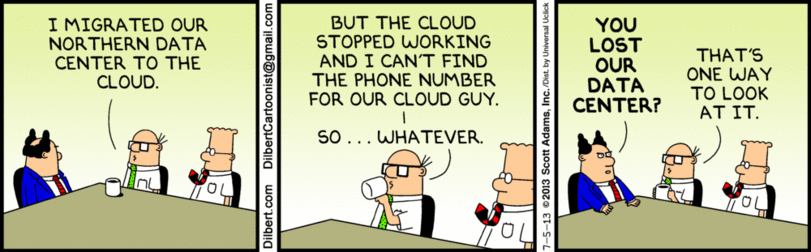

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [206]:
#10 Importación de librerias

import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


In [207]:
#20 Lectura del conjunto de datos original, en formato CSV si lo subimos al servidor del FAMAF
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.8,145.0,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8,145.0,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8,145.0,Northern Metropolitan,4019.0


In [208]:
#30 Obtención del conjunto de datos procesados en Entregable 1 desde GitHub, en formato CSV 

!wget https://raw.githubusercontent.com/safranco8/ayvd-entregables-grupo-31/main/AEyC/melb_data_extended_grupo31.csv

--2022-06-18 19:56:46--  https://raw.githubusercontent.com/safranco8/ayvd-entregables-grupo-31/main/AEyC/melb_data_extended_grupo31.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2680131 (2.6M) [text/plain]
Saving to: ‘melb_data_extended_grupo31.csv.4’

melb_data_extended_ 100%[===================>]   2.56M  --.-KB/s    in 0.02s   

2022-06-18 19:56:46 (160 MB/s) - ‘melb_data_extended_grupo31.csv.4’ saved [2680131/2680131]



In [209]:
#40 Conversión del CSV a dataframe del conjunto de datos procesados en Entregable 1

melb_grupo31_df = pandas.read_csv('melb_data_extended_grupo31.csv')
melb_grupo31_df[:3]

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Lattitude,Longtitude,Regionname,Propertycount,avg_price,avg_monthly_price,avg_weekly_price,avg_review_scores_rating,zipcode_count,avg_weekly_price_q
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,-37.8,145.0,Northern Metropolitan,4019.0,130.6,2187.0,605.1,95.3,258.0,"(590.0, 606.75]"
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,-37.8,145.0,Northern Metropolitan,4019.0,130.6,2187.0,605.1,95.3,258.0,"(590.0, 606.75]"
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,-37.8,145.0,Northern Metropolitan,4019.0,130.6,2187.0,605.1,95.3,258.0,"(590.0, 606.75]"


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [210]:
#50 Selección de una variable categórica y una numérica
categorical_cols = ['Type', 'Suburb', 'Regionname']
numerical_cols = ['Price', 'Rooms','Landsize','Distance','avg_price','avg_monthly_price','avg_weekly_price']

In [211]:
#60 Exploramos las columnas categoricas del punto anterior y sus tipos de datos
melb_grupo31_df[categorical_cols].nunique()

Type            3
Suburb        314
Regionname      8
dtype: int64

In [212]:
#70 Verificamos si hay valores nulos en las columnas categoricas selecionadas anteriormente
# Check for nulls
melb_grupo31_df[categorical_cols].isna().sum()

Type          0
Suburb        0
Regionname    0
dtype: int64

In [213]:
#80 Exploramos las columnas numéricas anteriormente seleccionadas
melb_grupo31_df.value_counts(categorical_cols)

Type  Suburb            Regionname           
h     Reservoir         Northern Metropolitan    253
      Preston           Northern Metropolitan    207
      Bentleigh East    Southern Metropolitan    168
      Brunswick         Northern Metropolitan    157
      Coburg            Northern Metropolitan    147
                                                ... 
      Emerald           Eastern Victoria           1
t     Meadow Heights    Northern Metropolitan      1
u     Jacana            Northern Metropolitan      1
      Hoppers Crossing  Western Metropolitan       1
h     Officer           Eastern Victoria           1
Length: 690, dtype: int64

In [214]:
#90 Contamos cuantas hay de cada una 
melb_grupo31_df.value_counts('Rooms')

Rooms
3     5730
2     3631
4     2361
1      680
5      429
6       55
7        7
8        7
10       1
dtype: int64

#CONSIGNA =
###Ejercicio 1: Encoding

1.   Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, excepto **BuildingArea** y **YearBuilt**, que volveremos a imputar más adelante.



In [215]:
#100 Exploramos los tipos de datos de las columnas

for column in melb_grupo31_df.columns:
    print(column, "---", melb_grupo31_df[column].dtype)

index --- int64
Suburb --- object
Address --- object
Rooms --- int64
Type --- object
Price --- float64
Method --- object
SellerG --- object
Date --- object
Distance --- float64
Postcode --- float64
Bedroom2 --- float64
Bathroom --- float64
Car --- float64
Landsize --- float64
BuildingArea --- float64
YearBuilt --- float64
CouncilArea --- object
Lattitude --- float64
Longtitude --- float64
Regionname --- object
Propertycount --- float64
avg_price --- float64
avg_monthly_price --- float64
avg_weekly_price --- float64
avg_review_scores_rating --- float64
zipcode_count --- float64
avg_weekly_price_q --- object


In [216]:
#110 Según la consigna, eliminamos las columnas BuildingArea y YearBuilt 
#para ello creamos una copia de nuestro dataframe original y verificamos como quedaron las columnas

melb_grupo31_reduced_df = melb_grupo31_df.copy()

del melb_grupo31_reduced_df['BuildingArea']
del melb_grupo31_reduced_df['YearBuilt']

for column in melb_grupo31_reduced_df.columns:
    print(column, "---", melb_grupo31_reduced_df[column].dtype)


index --- int64
Suburb --- object
Address --- object
Rooms --- int64
Type --- object
Price --- float64
Method --- object
SellerG --- object
Date --- object
Distance --- float64
Postcode --- float64
Bedroom2 --- float64
Bathroom --- float64
Car --- float64
Landsize --- float64
CouncilArea --- object
Lattitude --- float64
Longtitude --- float64
Regionname --- object
Propertycount --- float64
avg_price --- float64
avg_monthly_price --- float64
avg_weekly_price --- float64
avg_review_scores_rating --- float64
zipcode_count --- float64
avg_weekly_price_q --- object


In [217]:
#120 Exploramos la cantidad de registros
len(melb_grupo31_reduced_df.index) 

12901

# CONSIGNA =
###Ejercicio 1: Encoding

2.   Aplicar una codificación **One-hot encoding** a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.
**Algunas opciones:**
 

1.   Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 




In [218]:
#130 Seleccionamos los grupos de columnas categoricas y numéricas

feature_cols = ['Type', 'Suburb', 'Regionname']
numeric_cols = ['Price', 'Rooms','Landsize','Distance','avg_price','avg_monthly_price','avg_weekly_price']


In [219]:
#140 Aplicamos One Hot Encoder a todas las columnas de variable categórica

encoderC = OneHotEncoder(sparse=False)
encoderC.fit(melb_grupo31_reduced_df[feature_cols])

encoded_types = encoderC.transform(melb_grupo31_reduced_df[feature_cols])
encoded_types[:10]
#print(encoded_types)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [220]:
#150 Se puede observar que el One Hot Encoder ha hecho que se pierdan el nombre de las columnas
# Por ello al generar el Dataframe a partir de este, sigue sin nombre de las columnas

encoded_df = pandas.DataFrame(encoded_types)
encoded_df.head()

,0,1,2,3,4,5,6,7,8,9,...,315,316,317,318,319,320,321,322,323,324
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [221]:
#160 Recuperamos el nombre de las columnas con el parametro ".categories_" para poder agregarlo al Dataframe
#NOTA: hay un arreglo por cada una de las variables categoricas

columna = list(encoderC.categories_)
columna

[array(['h', 't', 'u'], dtype=object),
 array(['Abbotsford', 'Aberfeldie', 'Airport West', 'Albanvale',
        'Albert Park', 'Albion', 'Alphington', 'Altona', 'Altona Meadows',
        'Altona North', 'Ardeer', 'Armadale', 'Ascot Vale', 'Ashburton',
        'Ashwood', 'Aspendale', 'Aspendale Gardens', 'Attwood',
        'Avondale Heights', 'Bacchus Marsh', 'Balaclava', 'Balwyn',
        'Balwyn North', 'Bayswater', 'Bayswater North', 'Beaconsfield',
        'Beaconsfield Upper', 'Beaumaris', 'Bellfield', 'Bentleigh',
        'Bentleigh East', 'Berwick', 'Black Rock', 'Blackburn',
        'Blackburn North', 'Blackburn South', 'Bonbeach', 'Boronia',
        'Box Hill', 'Braybrook', 'Briar Hill', 'Brighton', 'Brighton East',
        'Broadmeadows', 'Brookfield', 'Brooklyn', 'Brunswick',
        'Brunswick East', 'Brunswick West', 'Bulleen', 'Bullengarook',
        'Bundoora', 'Burnley', 'Burnside', 'Burnside Heights', 'Burwood',
        'Burwood East', 'Cairnlea', 'Camberwell', 'Campbel

In [222]:
# 170 Recupero todos los nombre de columnas en un unico arreglo para luego agregarlo al Dataframe
# Para ello recorro todos los arreglos que hay en "columna" y los guardo en "nombre_cols"
# Los nombre de columna van a contener el nombre original de la columna mas el valor de la categoria generada por One Hot Encoder
# siguiendo el formato: "<nombre_categoría>: <categoría>"

nombre_cols = []
for i in range(len(feature_cols)):
  for j in range(len(columna[i])):
    nombre_cols.append(str(feature_cols[i]) + ": " + str(columna[i][j]))

nombre_cols

['Type: h',
 'Type: t',
 'Type: u',
 'Suburb: Abbotsford',
 'Suburb: Aberfeldie',
 'Suburb: Airport West',
 'Suburb: Albanvale',
 'Suburb: Albert Park',
 'Suburb: Albion',
 'Suburb: Alphington',
 'Suburb: Altona',
 'Suburb: Altona Meadows',
 'Suburb: Altona North',
 'Suburb: Ardeer',
 'Suburb: Armadale',
 'Suburb: Ascot Vale',
 'Suburb: Ashburton',
 'Suburb: Ashwood',
 'Suburb: Aspendale',
 'Suburb: Aspendale Gardens',
 'Suburb: Attwood',
 'Suburb: Avondale Heights',
 'Suburb: Bacchus Marsh',
 'Suburb: Balaclava',
 'Suburb: Balwyn',
 'Suburb: Balwyn North',
 'Suburb: Bayswater',
 'Suburb: Bayswater North',
 'Suburb: Beaconsfield',
 'Suburb: Beaconsfield Upper',
 'Suburb: Beaumaris',
 'Suburb: Bellfield',
 'Suburb: Bentleigh',
 'Suburb: Bentleigh East',
 'Suburb: Berwick',
 'Suburb: Black Rock',
 'Suburb: Blackburn',
 'Suburb: Blackburn North',
 'Suburb: Blackburn South',
 'Suburb: Bonbeach',
 'Suburb: Boronia',
 'Suburb: Box Hill',
 'Suburb: Braybrook',
 'Suburb: Briar Hill',
 'Suburb:

In [223]:
#180 Renombramos las columnas del Dataframe para que ahora tengan un nombre entendible
melb_onehotencode_df = pandas.DataFrame(encoded_types)
melb_onehotencode_df.columns = nombre_cols
melb_onehotencode_df


,Type: h,Type: t,Type: u,Suburb: Abbotsford,Suburb: Aberfeldie,Suburb: Airport West,Suburb: Albanvale,Suburb: Albert Park,Suburb: Albion,Suburb: Alphington,...,Suburb: Yarra Glen,Suburb: Yarraville,Regionname: Eastern Metropolitan,Regionname: Eastern Victoria,Regionname: Northern Metropolitan,Regionname: Northern Victoria,Regionname: South-Eastern Metropolitan,Regionname: Southern Metropolitan,Regionname: Western Metropolitan,Regionname: Western Victoria
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12896,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12897,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12898,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12899,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [224]:
#190 Agregamos las variables numéricas al Dataframe
melb_onehotencode_full_df = pandas.DataFrame(numpy.hstack([melb_onehotencode_df, melb_grupo31_reduced_df[numeric_cols]]))
melb_onehotencode_full_df.columns = numpy.concatenate([nombre_cols, numeric_cols]).ravel()
melb_onehotencode_full_df = pandas.DataFrame(melb_onehotencode_full_df)

melb_onehotencode_full_df.head()

,Type: h,Type: t,Type: u,Suburb: Abbotsford,Suburb: Aberfeldie,Suburb: Airport West,Suburb: Albanvale,Suburb: Albert Park,Suburb: Albion,Suburb: Alphington,...,Regionname: Southern Metropolitan,Regionname: Western Metropolitan,Regionname: Western Victoria,Price,Rooms,Landsize,Distance,avg_price,avg_monthly_price,avg_weekly_price
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1480000.0,2.0,202.0,2.5,130.6,2187.0,605.1
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1035000.0,2.0,156.0,2.5,130.6,2187.0,605.1
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1465000.0,3.0,134.0,2.5,130.6,2187.0,605.1
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,850000.0,3.0,94.0,2.5,130.6,2187.0,605.1
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1600000.0,4.0,120.0,2.5,130.6,2187.0,605.1


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

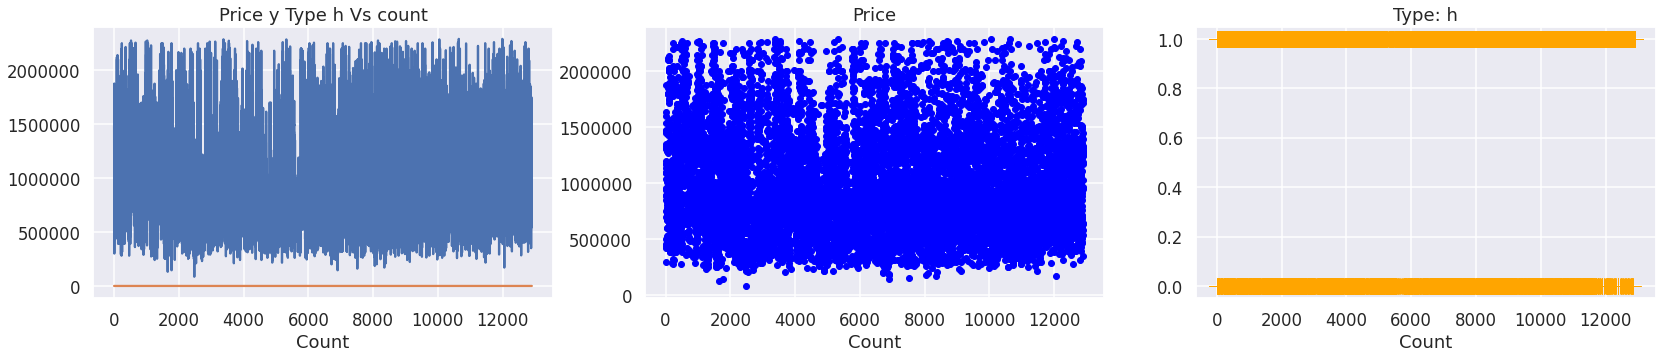

In [225]:
#191 Graficamos para ver si es necesario  estandarizar o escalar los datos previamente

fig = plt.figure(figsize=(28, 5))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax2.ticklabel_format(style='plain')
ax1.set_title("Price y Type h Vs count")
cols = ['Price','Type: h']
original = melb_onehotencode_full_df[cols]
ax1.ticklabel_format(style='plain')
ax1.set_xlabel("Count")
ax2.set_xlabel("Count")
ax3.set_xlabel("Count")
ax1.plot(original)
ax2.set_title("Price")
ax2.plot(melb_onehotencode_full_df['Price'], linewidth=0, marker="o", color="blue", markersize=6)

ax3.set_title("Type: h")
ax3.plot(melb_onehotencode_full_df['Type: h'], linewidth=0, marker="+", color="orange", markersize=16)

plt.show()

#De lo graficado vemos que es necesario escalar las variables numéricas ya que no tienen la misma escala. Ejemplo Type vs Price 

,Type: h,Type: t,Type: u,Suburb: Abbotsford,Suburb: Aberfeldie,Suburb: Airport West,Suburb: Albanvale,Suburb: Albert Park,Suburb: Albion,Suburb: Alphington,...,Regionname: Southern Metropolitan,Regionname: Western Metropolitan,Regionname: Western Victoria,Price,Rooms,Landsize,Distance,avg_price,avg_monthly_price,avg_weekly_price
count,12901.0,12901.0,12901.0,12901.0,12901.0,12901.0,12901.0,12901.0,12901.0,12901.0,...,12901.0,12901.0,12901.0,12901.0,12901.0,12901.0,12901.0,12710.0,11641.0,12027.0
mean,0.7,0.1,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.3,0.2,0.0,975668.3,2.9,516.5,10.3,129.8,2565.6,695.1
std,0.5,0.3,0.4,0.1,0.1,0.1,0.0,0.1,0.1,0.0,...,0.5,0.4,0.0,445404.1,0.9,1501.0,6.0,63.7,1404.4,331.9
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,85000.0,1.0,0.0,0.0,43.5,600.0,160.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,635000.0,2.0,167.0,6.2,94.2,1567.5,465.2
50%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,880000.0,3.0,414.0,9.4,114.1,2215.0,606.8
75%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1260000.0,3.0,644.0,13.0,147.4,3366.7,896.1
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2290000.0,10.0,76000.0,48.1,759.1,10060.0,2236.7


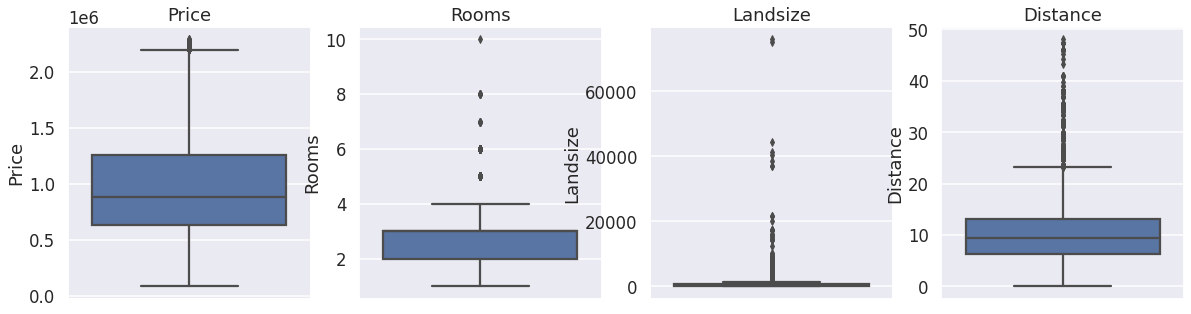

In [226]:
#192 Evaluamos para ver si hay ouliers 
fig, ejes = plt.subplots(1, 4, figsize=(20, 5), sharex=True)
pandas.options.display.float_format = '{:.1f}'.format
for nombre, eje in zip(['Price', 'Rooms',	'Landsize',	'Distance'], ejes):
    seaborn.boxplot(data=melb_onehotencode_full_df,  y=nombre, ax=eje)
    eje.set_title(nombre)
    if eje != ejes[-1]:
        eje.set_xlabel('')

melb_onehotencode_full_df.describe()

9324


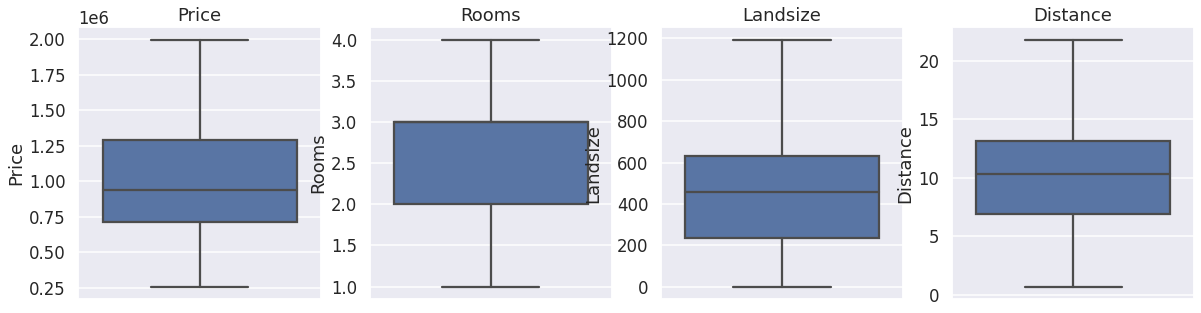

In [227]:
#193 eliminamos outliers y verificamos que no se pierdan una cantidad relevante de datos

melb_onehotencode_full_Filtrado_df = melb_onehotencode_full_df[(melb_onehotencode_full_df['Price']<2000000)&(melb_onehotencode_full_df['Rooms']<5)&(melb_onehotencode_full_df['Price']>250000)&((melb_onehotencode_full_df['Landsize']>0)&(melb_onehotencode_full_df['Landsize']<1200))&((melb_onehotencode_full_df['Distance']>0)&(melb_onehotencode_full_df['Distance']<22))]
fig, ejes = plt.subplots(1, 4, figsize=(20, 5), sharex=True)
for nombre, eje in zip(['Price','Rooms',	'Landsize',	'Distance'], ejes):
    seaborn.boxplot(data=melb_onehotencode_full_Filtrado_df,  y=nombre, ax=eje)
    eje.set_title(nombre)
    if eje != ejes[-1]:
        eje.set_xlabel('')


print(len(melb_onehotencode_full_Filtrado_df))

In [228]:
#194 por lo visto anteriormente es necesario escalar los datos ya que las variables categóricas convertidas con OneHotEncoder 
# quedan comprendidas en valores entre 0 y 1 las variables numéricas tienen valores muy dispares para compararles 
# tales como Price con valores posibles hasta más de 2 millones o Bathroom con valores de 0 hasta 8

datos = melb_onehotencode_full_Filtrado_df.copy() #porque hay algunos NaN 
scaler = MinMaxScaler(feature_range=(0, 1))
melb_onehotencode_full_escalado = preprocessing.MinMaxScaler().fit_transform(datos)

#Agrego las columnas al df
melb_onehotencode_full_escalado_df  = pandas.DataFrame(melb_onehotencode_full_escalado)
melb_onehotencode_full_escalado_df.columns = melb_onehotencode_full_df.columns
melb_onehotencode_full_escalado_df



,Type: h,Type: t,Type: u,Suburb: Abbotsford,Suburb: Aberfeldie,Suburb: Airport West,Suburb: Albanvale,Suburb: Albert Park,Suburb: Albion,Suburb: Alphington,...,Regionname: Southern Metropolitan,Regionname: Western Metropolitan,Regionname: Western Victoria,Price,Rooms,Landsize,Distance,avg_price,avg_monthly_price,avg_weekly_price
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.7,0.3,0.2,0.1,0.1,0.2,0.2
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.4,0.3,0.1,0.1,0.1,0.2,0.2
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.7,0.7,0.1,0.1,0.1,0.2,0.2
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.3,0.7,0.1,0.1,0.1,0.2,0.2
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.8,1.0,0.1,0.1,0.1,0.2,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9319,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.2,0.7,0.2,0.7,0.1,NaN,0.1
9320,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.6,1.0,0.5,0.8,0.1,0.2,0.2
9321,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.4,0.7,0.3,0.3,0.2,0.2,0.2
9322,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.5,0.7,0.4,0.3,0.2,0.2,0.2


In [144]:
#200 Según consigna 2.1 agregamos las columnas YearBuilt y BuildingArea

melb_data_mice = melb_onehotencode_full_escalado_df.copy(deep=True)
melb_data_mice['YearBuilt'] = melb_grupo31_df['YearBuilt']
melb_data_mice['BuildingArea'] = melb_grupo31_df['BuildingArea']
melb_data_mice


,Type: h,Type: t,Type: u,Suburb: Abbotsford,Suburb: Aberfeldie,Suburb: Airport West,Suburb: Albanvale,Suburb: Albert Park,Suburb: Albion,Suburb: Alphington,...,Regionname: Western Victoria,Price,Rooms,Landsize,Distance,avg_price,avg_monthly_price,avg_weekly_price,YearBuilt,BuildingArea
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.7,0.3,0.2,0.1,0.1,0.2,0.2,NaN,NaN
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.4,0.3,0.1,0.1,0.1,0.2,0.2,1900.0,79.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.7,0.7,0.1,0.1,0.1,0.2,0.2,1900.0,150.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.3,0.7,0.1,0.1,0.1,0.2,0.2,NaN,NaN
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.8,1.0,0.1,0.1,0.1,0.2,0.2,2014.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9319,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.2,0.7,0.2,0.7,0.1,NaN,0.1,NaN,NaN
9320,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.6,1.0,0.5,0.8,0.1,0.2,0.2,2006.0,490.0
9321,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.4,0.7,0.3,0.3,0.2,0.2,0.2,NaN,NaN
9322,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.7,0.4,0.3,0.2,0.2,0.2,NaN,NaN


count   5723.0
mean    1963.8
std       36.3
min     1830.0
25%     1940.0
50%     1970.0
75%     1999.0
max     2018.0
Name: YearBuilt, dtype: float64

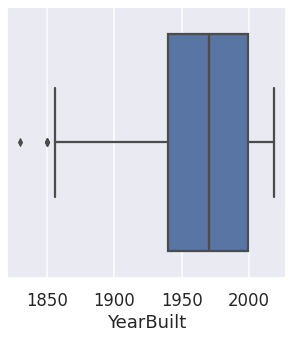

In [145]:
#210 verificamos los outliers de YearBuilt
datos2 = melb_data_mice.copy() #les dejo los NAN
plt.figure(figsize=(5, 5))
seaborn.boxplot(data=datos2,x ='YearBuilt')
datos2.YearBuilt.describe()

count   4962.0
mean     135.2
std      133.0
min        0.0
25%       87.0
50%      119.0
75%      160.0
max     6791.0
Name: BuildingArea, dtype: float64

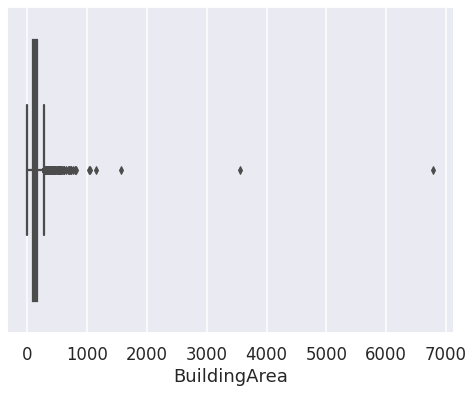

In [146]:
#220 verificamos los outliers de BuildingArea
seaborn.boxplot(data=datos2,x ='BuildingArea')
datos2.BuildingArea.describe()

In [230]:
#230 eliminamos outliers y verificamos que no se pierdan una cantidad relevante de datos
datos2 = datos2[(datos2['YearBuilt']>1900)|(datos2['YearBuilt'].isna())]
datos2 = datos2[((datos2['BuildingArea']>0)&(datos2['BuildingArea']<250))|(datos2['BuildingArea'].isna())]

datos2.describe()
#Mantenemos la mayorías de los datos (8533 de 12901)

,Type: h,Type: t,Type: u,Suburb: Abbotsford,Suburb: Aberfeldie,Suburb: Airport West,Suburb: Albanvale,Suburb: Albert Park,Suburb: Albion,Suburb: Alphington,...,Regionname: Western Victoria,Price,Rooms,Landsize,Distance,avg_price,avg_monthly_price,avg_weekly_price,YearBuilt,BuildingArea
count,8533.0,8533.0,8533.0,8533.0,8533.0,8533.0,8533.0,8533.0,8533.0,8533.0,...,8533.0,8533.0,8533.0,8533.0,8533.0,8398.0,7634.0,7928.0,4967.0,4235.0
mean,0.8,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.4,0.6,0.4,0.4,0.1,0.2,0.3,1970.3,120.0
std,0.4,0.3,0.3,0.1,0.1,0.1,0.0,0.1,0.1,0.0,...,0.0,0.2,0.2,0.2,0.2,0.1,0.2,0.2,29.9,49.3
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1902.0,1.0
25%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.3,0.3,0.2,0.3,0.1,0.1,0.1,1950.0,84.0
50%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.4,0.7,0.4,0.5,0.1,0.2,0.2,1970.0,115.0
75%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.6,0.7,0.5,0.6,0.1,0.3,0.3,2000.0,150.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2017.0,249.0


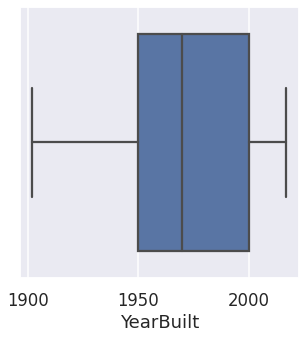

In [148]:
#240 verificamos nuevamente para ver si hay outliers de YearBuilt

plt.figure(figsize=(5, 5))
seaborn.boxplot(data=datos2,x ='YearBuilt')

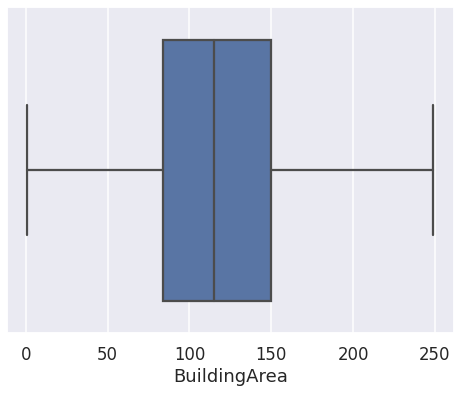

In [149]:
#250 verificamos los outliers de BuildingArea
seaborn.boxplot(data=datos2,x ='BuildingArea')

In [150]:
#260 Escalamos los valores de YearBuilt y BuildingArea

scaler = MinMaxScaler(feature_range=(0, 1))
melb_escalado_full = preprocessing.MinMaxScaler().fit_transform(datos2)

#Agrego las columnas al df

melb_escalado_full_df  = pandas.DataFrame(melb_escalado_full)
melb_escalado_full_df.columns = melb_data_mice.columns

#vemos que a pesar de tener todas las columnas escaladas, YearBuilt y BuildingArea tienen NaN
print(melb_escalado_full_df.isna().sum())
melb_escalado_full_NaN_df=melb_escalado_full_df.copy()
melb_escalado_full_NaN_df

Type: h                  0
Type: t                  0
Type: u                  0
Suburb: Abbotsford       0
Suburb: Aberfeldie       0
                      ... 
avg_price              135
avg_monthly_price      899
avg_weekly_price       605
YearBuilt             3566
BuildingArea          4298
Length: 334, dtype: int64


,Type: h,Type: t,Type: u,Suburb: Abbotsford,Suburb: Aberfeldie,Suburb: Airport West,Suburb: Albanvale,Suburb: Albert Park,Suburb: Albion,Suburb: Alphington,...,Regionname: Western Victoria,Price,Rooms,Landsize,Distance,avg_price,avg_monthly_price,avg_weekly_price,YearBuilt,BuildingArea
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.7,0.3,0.2,0.1,0.1,0.2,0.2,NaN,NaN
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.3,0.7,0.1,0.1,0.1,0.2,0.2,NaN,NaN
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.8,1.0,0.1,0.1,0.1,0.2,0.2,1.0,0.6
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.4,0.3,0.2,0.1,0.1,0.2,0.2,NaN,NaN
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.9,0.7,0.2,0.1,0.1,0.2,0.2,0.1,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8528,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.2,1.0,0.6,0.7,0.1,0.2,0.2,NaN,NaN
8529,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.2,0.7,0.2,0.7,0.1,NaN,0.1,NaN,NaN
8530,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.4,0.7,0.3,0.3,0.2,0.2,0.2,NaN,NaN
8531,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.7,0.4,0.3,0.2,0.2,0.2,NaN,NaN


In [151]:
#270 Según consigna 2.2 aplicamos IterativeImputer y KNeighborsRegressor
# para completar los datos faltantes de las columnas YearBuilt y BuildingArea
# Utilizamos adicionalmente información de Rooms, Price, Landsize y Distance para luego verificar en los gráficos
# que los valores imputados sean cercanos al de los valores originales (ver celda #300 y #310)

mice_imputer_df = melb_escalado_full_NaN_df.copy()
mice_imputer = IterativeImputer(random_state=1, estimator=KNeighborsRegressor(n_neighbors=2))
columnas_numericas =['YearBuilt', 'BuildingArea','Rooms', 'Price', 'Landsize', 'Distance']
mice_imputer_df = mice_imputer.fit_transform(mice_imputer_df[columnas_numericas])
mice_imputer_df2 = pandas.DataFrame(mice_imputer_df, index=melb_escalado_full_NaN_df[columnas_numericas].index, columns=melb_escalado_full_NaN_df[columnas_numericas].columns)

#Verificamos no haber perdido datos
print(len(mice_imputer_df),len(melb_escalado_full_NaN_df))

#Verificamos que se han completado los datos faltantes
print(mice_imputer_df2.isna().sum())


8533 8533
YearBuilt       0
BuildingArea    0
Rooms           0
Price           0
Landsize        0
Distance        0
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [152]:
#280 Analizamos la imputación 
melb_aux1 = mice_imputer_df2.copy()
melb_aux1.describe()


,YearBuilt,BuildingArea,Rooms,Price,Landsize,Distance
count,8533.0,8533.0,8533.0,8533.0,8533.0,8533.0
mean,0.6,0.5,0.6,0.4,0.4,0.4
std,0.2,0.2,0.2,0.2,0.2,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.4,0.4,0.3,0.3,0.2,0.3
50%,0.6,0.5,0.7,0.4,0.4,0.5
75%,0.8,0.6,0.7,0.6,0.5,0.6
max,1.0,1.0,1.0,1.0,1.0,1.0


Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

In [231]:
#290 Creamos un df auxiliar y borramos las columnas sin imputar y le concatenamos las imputadas

melb_aux2 = melb_escalado_full_NaN_df.copy()
del melb_aux2['YearBuilt']
del melb_aux2['BuildingArea']
del melb_aux2['Rooms']
del melb_aux2['Price']
del melb_aux2['Landsize']
del melb_aux2['Distance']
melb_aux2[columnas_numericas] = melb_aux1[columnas_numericas]
melb_ohe_esc_YB_BA_KNN = melb_aux2.copy()
melb_ohe_esc_YB_BA_KNN

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


,Type: h,Type: t,Type: u,Suburb: Abbotsford,Suburb: Aberfeldie,Suburb: Airport West,Suburb: Albanvale,Suburb: Albert Park,Suburb: Albion,Suburb: Alphington,...,Regionname: Western Victoria,avg_price,avg_monthly_price,avg_weekly_price,YearBuilt,BuildingArea,Rooms,Price,Landsize,Distance
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.1,0.2,0.2,0.9,0.5,0.3,0.7,0.2,0.1
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.1,0.2,0.2,0.8,0.5,0.7,0.3,0.1,0.1
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.1,0.2,0.2,1.0,0.6,1.0,0.8,0.1,0.1
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.1,0.2,0.2,0.7,0.2,0.3,0.4,0.2,0.1
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.1,0.2,0.2,0.1,0.8,0.7,0.9,0.2,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8528,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.1,0.2,0.2,0.8,0.3,1.0,0.2,0.6,0.7
8529,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.1,NaN,0.1,0.4,0.5,0.7,0.2,0.2,0.7
8530,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.2,0.2,0.2,0.4,0.3,0.7,0.4,0.3,0.3
8531,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.2,0.2,0.2,0.5,0.5,0.7,0.5,0.4,0.3


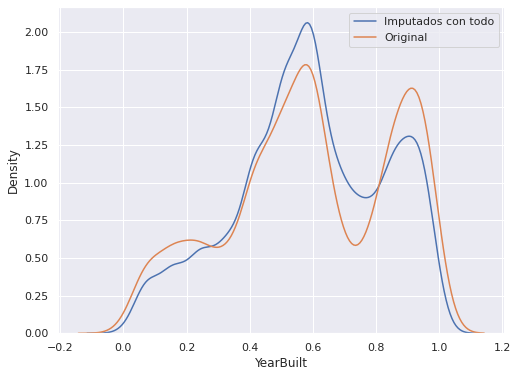

In [232]:
#300 graficamos YearBuilt y verificamos que los valores imputados sean cercanos al de los valores originales 

seaborn.set(rc={'figure.figsize':(8,6)})
ax = seaborn.kdeplot(melb_ohe_esc_YB_BA_KNN.YearBuilt,label="Imputados con todo")
ax = seaborn.kdeplot(melb_escalado_full_NaN_df.YearBuilt,label="Original")
ax.legend()

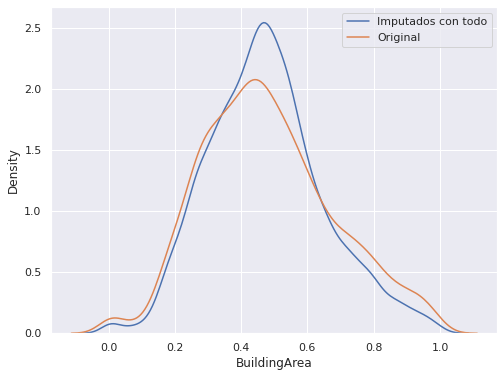

In [233]:
#310 graficamos BuildingArea y verificamos que los valores imputados sean cercanos al de los valores originales 
seaborn.set(rc={'figure.figsize':(8,6)})
ax = seaborn.kdeplot(melb_ohe_esc_YB_BA_KNN.BuildingArea,label="Imputados con todo")
ax = seaborn.kdeplot(melb_escalado_full_NaN_df.BuildingArea,label="Original")
ax.legend()

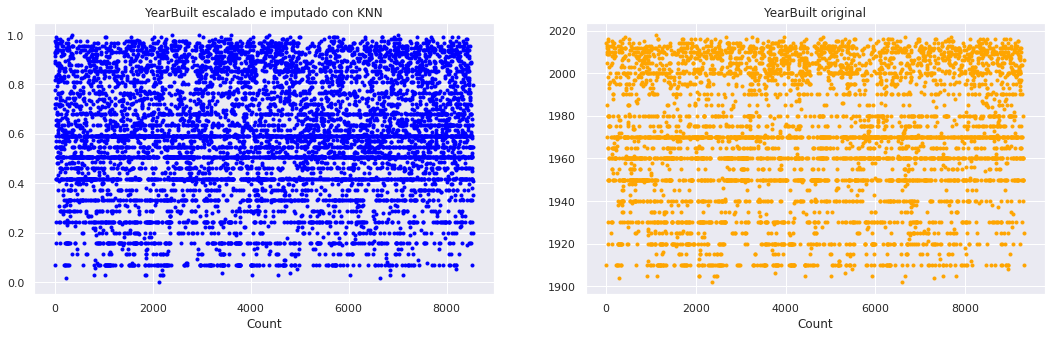

In [234]:
#320 verificamos la distribución de Yearbuil escalado y con KNN corresponda con la original
fig = plt.figure(figsize=(28, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax2.ticklabel_format(style='plain')
ax1.ticklabel_format(style='plain')
ax1.set_xlabel("Count")
ax2.set_xlabel("Count")
ax1.set_title("YearBuilt escalado e imputado con KNN")
ax1.plot(melb_ohe_esc_YB_BA_KNN['YearBuilt'], linewidth=0, marker=".", color="blue", markersize=6)
ax2.set_title("YearBuilt original")
melb_fil = melb_data_mice[melb_data_mice['YearBuilt']>1900]
ax2.plot(melb_fil['YearBuilt'], linewidth=0, marker=".", color="orange", markersize=6)

plt.show()

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [200]:
#330 Estandarizamos los datos (rango -1/+1) para poder aplicar PCA
#NOTA: pasamos de una Dataframe a un arreglo de numpy, por lo que se pierden los nombre de columnas

pca_init = numpy.nan_to_num(melb_ohe_esc_YB_BA_KNN.copy()) 

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_pca = scaler.fit_transform(pca_init)

In [201]:
#340 Convertimos el arreglo de numpy nuevamente a Dataframe y le agregamos los nombres de columna correspondiente

scaled_pca_df = pandas.DataFrame(scaled_pca)
scaled_pca_df
scaled_pca_df.columns = numpy.concatenate([nombre_cols, numeric_cols, ["YearBuilt", "BuildingArea"]]).ravel()


In [202]:
#350 Respondemos consigna 3.1
# Aplicamos PCA para obtener los N=20 componentes principales del arreglo

n = min(20, scaled_pca.shape[0])
pca = PCA(n)
pca.fit(scaled_pca)
proyected_features = pca.transform(scaled_pca)

proyected_features

array([[-1.22316773,  1.02198924, -0.3047369 , ...,  0.06101973,
         0.09843807,  0.02520536],
       [-1.31562151,  0.97323403, -0.18541818, ...,  0.05761099,
        -0.00763782,  0.0415368 ],
       [-1.29835733,  0.86170207, -0.54529744, ...,  0.08859762,
         0.04380385,  0.04542375],
       ...,
       [-0.32809748, -1.61909013,  0.37225571, ...,  0.02904288,
        -0.04309735, -0.06870878],
       [-0.32492745, -1.64405881,  0.3059564 , ...,  0.03894922,
        -0.03835692, -0.07436286],
       [-0.30085777, -1.71897658,  0.13728192, ...,  0.14189191,
        -0.16605005, -0.67411736]])

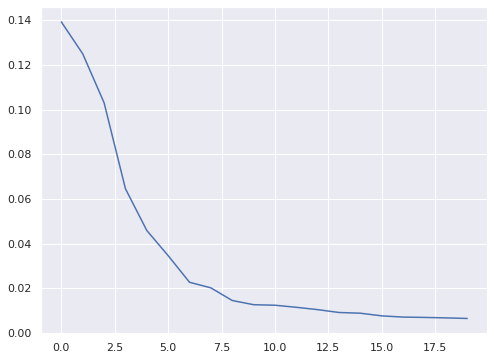

In [203]:
#360 Respondemos consigna 3.2
# Graficamos varianza de cada componente N (las principales)

seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_)

In [204]:
#370 Respondemos consigna 3.3
# En base al grafico anterior, consideramos que las 5 primeras componentes, son los más representativas y
# los agregamos como columnas a el Dataframe original

scaled_pca_df[['pca1_scaled', 'pca2_scaled', 'pca3_scaled', 'pca4_scaled', 'pca5_scaled']] = proyected_features[:,:5]
scaled_pca_df

,Type: h,Type: t,Type: u,Suburb: Abbotsford,Suburb: Aberfeldie,Suburb: Airport West,Suburb: Albanvale,Suburb: Albert Park,Suburb: Albion,Suburb: Alphington,...,avg_price,avg_monthly_price,avg_weekly_price,YearBuilt,BuildingArea,pca1_scaled,pca2_scaled,pca3_scaled,pca4_scaled,pca5_scaled
0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.1,-0.3,0.4,-0.7,-0.8,-1.2,1.0,-0.3,-0.5,0.0
1,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.1,0.3,-0.3,-0.8,-0.8,-1.3,1.0,-0.2,-0.5,0.1
2,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.1,1.0,0.5,-0.8,-0.8,-1.3,0.9,-0.5,-0.4,0.3
3,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.6,-0.3,-0.2,-0.7,-0.8,-1.3,1.0,-0.1,-0.5,-0.1
4,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.7,0.3,0.9,-0.6,-0.8,-1.2,0.9,-0.6,-0.5,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8528,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.4,1.0,-0.6,0.1,0.3,-0.4,-1.8,0.3,-0.2,-0.0
8529,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.0,0.3,-0.6,-0.6,0.5,-1.4,0.8,-0.1,-0.0,-0.1
8530,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.5,0.3,-0.1,-0.4,-0.4,-0.3,-1.6,0.4,-0.6,-0.0
8531,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.0,0.3,0.0,-0.3,-0.4,-0.3,-1.6,0.3,-0.6,-0.0


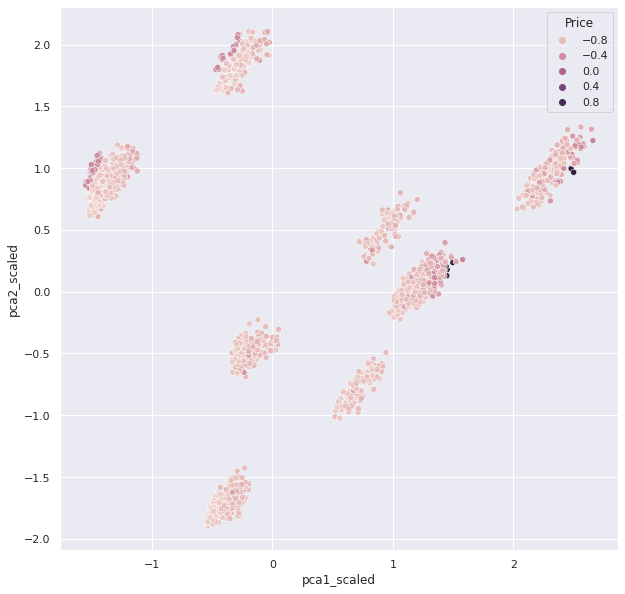

In [205]:
#380 Graficamos las primeras componentes de PCA
data = scaled_pca_df.sample(3000)
scaled_pca_df

fig = plt.figure(figsize=(10, 10))
seaborn.scatterplot(data=data, x='pca1_scaled', y='pca2_scaled', hue='Price')

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

### RESPUESTAS =

*   Estas operaciones ya las habiamos realizado previamente en las celdas **#160**, **#170** y **#180**
*   Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas

de la matriz.

NOTA: las celdas que siguen mas abajo, son celdas que vinieron en el trabajo practico, no hemos cambiado nada.


In [75]:
## Small example


## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

X_cat = encoder.fit_transform(melb_df[categorical_cols])

for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

Matrix has shape (13580, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria']


In [76]:
# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))


Matrix has shape (13580, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria', 'Rooms', 'Distance']


In [77]:
# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])


In [ ]:

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

,Type=h,Type=t,Type=u,Regionname=Eastern Metropolitan,Regionname=Eastern Victoria,Regionname=Northern Metropolitan,Regionname=Northern Victoria,Regionname=South-Eastern Metropolitan,Regionname=Southern Metropolitan,Regionname=Western Metropolitan,Regionname=Western Victoria,Rooms,Distance,pca1,pca2
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.7,-0.3
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.7,-0.3
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.6,0.6
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.6,0.6
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.5,-7.6,1.5


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transformaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otros desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
## Criterios de exclusión (o inclusión) de filas

Se eliminan los outliers de las variables con los siguientes criterios:

1.	YearBuilt: se eliminan las construidas antes de 1900
2.	BuildingArea: se eliminan las áreas construidas iguales a 0 o mayores a 250 m2
3.	Price: se eliminan las que cuestan menos de $250.000 o más de $2.000.000
4.	Rooms: se eliminan las que tienen más de 4 habitaciones
5.	Landsize: se eliminan los terrenos iguales a 0 o mayores a 1200 m2
6.	Distance: se eliminan las distancias al centro iguales a 0 o mayores a 22km

Se eliminaron variables que no tuvieran relación con el precio de las viviendas o estuvieran correlacionadas con otras variables ya incluidas. Ejemplos:

1.	SellerG fue eliminada ya que el cambio de valor de esta variable no tiene relación con el precio final.
2.	Bedroom2 fue excluida ya que se verificó en la parte 1 del practico que tenía una fuerte correlación con Rooms

## Características seleccionadas
## Características categóricas

Se redujo el Dataframe y se trató las variables categóricas con OneHotEncoding.

1.	Type: tipo de propiedad. 3 valores posibles.  h=house,cottage,villa, semi,terrace; u= unit, duplex; t=townhouse	
2.	Suburb 314 valores posibles de suburbios
3.	Regionname 8 valores posibles de regiones (West, North West, North, North east …etc)

## Características numéricas

1.	Rooms: cantidad de habitaciones.
2.	Distance: distancia al centro de la ciudad.
3.	Price: precio de compra/venta de la propiedad.
4.	Landsize: tamaño del terreno.
5.	BuildingArea: metros cuadrados construidos.
6.	YearBuilt: año de construcción.
7.	avg_price: se agrega el precio promedio diario de publicaciones de la plataforma AirBnB en el mismo código postal. [Link al repositorio con datos externos]. 
8.	avg_weekly_price: se agrega el precio semanal diario de publicaciones de la plataforma AirBnB en el mismo código postal. [Link al repositorio con datos externos].
9.	avg_monthly_price: se agrega el precio promedio mensual de publicaciones de la plataforma AirBnB en el mismo código postal. [Link al repositorio con datos externos].

avg_price, avg_monthly_price y avg_weekly_price obtenidos de AirBnB y procesados en 20220607_entregable_parte_1_22.ipynb 

## Transformaciones:

1.	Todas las características numéricas fueron escaladas usando MinMaxScaler previo a ser imputadas, solo los valores distintos a NaN. Al aplicar MinMaxScaler, reemplazaba los NaN por 0, así que solo se les aplicó a los valores no nulos, manteniendo los NaN para luego ser imputados.  
2.	Las columnas ‘YearBuilt’ y ‘BuildingArea’ fueron imputadas utilizando el
algoritmo IterativeImputer, con el estimador KNeighborsRegressor. Se optó por un K=2  ya que imputaba más próximo a los datos originales.
3.	Se escalaron los datos con MinMaxScaler entre -1 y 1
4.	Se aplicó el método PCA para reducir la dimensionalidad y se calculó la varianza de las
primeras 20 componentes.


## Datos aumentados

1.	Se agregan las 5 primeras columnas obtenidas a través del método de PCA, ya que estas representan prácticamente el 80% de las componentes principales, para luego ser aplicado sobre el conjunto de datos totalmente procesado.

```